In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, PredictionErrorDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from tabulate import tabulate
from sklearn.linear_model import Lasso
import mlflow
from sklearn.linear_model import SGDRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous

path = 'datasets/LEAF_LEVEL_DATASET_Yufeng_Ge.xlsx'

# Read and load dataset
df= pd.read_excel(path, sheet_name=[0, 1])

/home/ubuntu/Desktop/Demetra/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INPUT DATA

In [2]:
X =df.get(0)
X = (X.iloc[:,14:]).values
print(X.shape)
print(X)

(2905, 2151)
[[0.10534241 0.12494414 0.10755504 ... 0.03171077 0.0314088  0.03064385]
 [0.08744413 0.11408205 0.1255238  ... 0.05223024 0.05225496 0.05238018]
 [0.09524734 0.11283996 0.10805123 ... 0.04718012 0.04704811 0.04683157]
 ...
 [0.08363266 0.09290786 0.083066   ... 0.04282517 0.04261783 0.04248545]
 [0.09348846 0.09856943 0.08780694 ... 0.04525967 0.04508637 0.04494107]
 [0.05796528 0.09717503 0.08508438 ... 0.03692887 0.03678274 0.03681707]]


OUTPUT DATA

In [3]:
Y =df.get(0)
Y = (Y.iloc[:,7]).values
print(Y.shape)

(2905,)


**LASSO with coordinate descent**

Ripartion: 0.3 - trial: 97
Ripartion: 0.3 - trial: 98
Ripartion: 0.3 - trial: 99
Param 2
Ripartion: 0.35 - trial: 0
Ripartion: 0.35 - trial: 1
Ripartion: 0.35 - trial: 2
Ripartion: 0.35 - trial: 3
Ripartion: 0.35 - trial: 4
Ripartion: 0.35 - trial: 5
Ripartion: 0.35 - trial: 6
Ripartion: 0.35 - trial: 7
Ripartion: 0.35 - trial: 8
Ripartion: 0.35 - trial: 9
Ripartion: 0.35 - trial: 10
Ripartion: 0.35 - trial: 11
Ripartion: 0.35 - trial: 12
Ripartion: 0.35 - trial: 13
Ripartion: 0.35 - trial: 14
Ripartion: 0.35 - trial: 15
Ripartion: 0.35 - trial: 16
Ripartion: 0.35 - trial: 17
Ripartion: 0.35 - trial: 18
Ripartion: 0.35 - trial: 19
Ripartion: 0.35 - trial: 20
Ripartion: 0.35 - trial: 21
Ripartion: 0.35 - trial: 22
Ripartion: 0.35 - trial: 23
Ripartion: 0.35 - trial: 24
Ripartion: 0.35 - trial: 25
Ripartion: 0.35 - trial: 26
Ripartion: 0.35 - trial: 27
Ripartion: 0.35 - trial: 28
Ripartion: 0.35 - trial: 29
Ripartion: 0.35 - trial: 30
Ripartion: 0.35 - trial: 31
Ripartion: 0.35 - trial: 

Ripartion: 0.45 - trial: 94
Ripartion: 0.45 - trial: 95
Ripartion: 0.45 - trial: 96
Ripartion: 0.45 - trial: 97
Ripartion: 0.45 - trial: 98
Ripartion: 0.45 - trial: 99
Param 2
Ripartion: 0.5 - trial: 0
Ripartion: 0.5 - trial: 1
Ripartion: 0.5 - trial: 2
Ripartion: 0.5 - trial: 3
Ripartion: 0.5 - trial: 4
Ripartion: 0.5 - trial: 5
Ripartion: 0.5 - trial: 6
Ripartion: 0.5 - trial: 7
Ripartion: 0.5 - trial: 8
Ripartion: 0.5 - trial: 9
Ripartion: 0.5 - trial: 10
Ripartion: 0.5 - trial: 11
Ripartion: 0.5 - trial: 12
Ripartion: 0.5 - trial: 13
Ripartion: 0.5 - trial: 14
Ripartion: 0.5 - trial: 15
Ripartion: 0.5 - trial: 16
Ripartion: 0.5 - trial: 17
Ripartion: 0.5 - trial: 18
Ripartion: 0.5 - trial: 19
Ripartion: 0.5 - trial: 20
Ripartion: 0.5 - trial: 21
Ripartion: 0.5 - trial: 22
Ripartion: 0.5 - trial: 23
Ripartion: 0.5 - trial: 24
Ripartion: 0.5 - trial: 25
Ripartion: 0.5 - trial: 26
Ripartion: 0.5 - trial: 27
Ripartion: 0.5 - trial: 28
Ripartion: 0.5 - trial: 29
Ripartion: 0.5 - trial: 

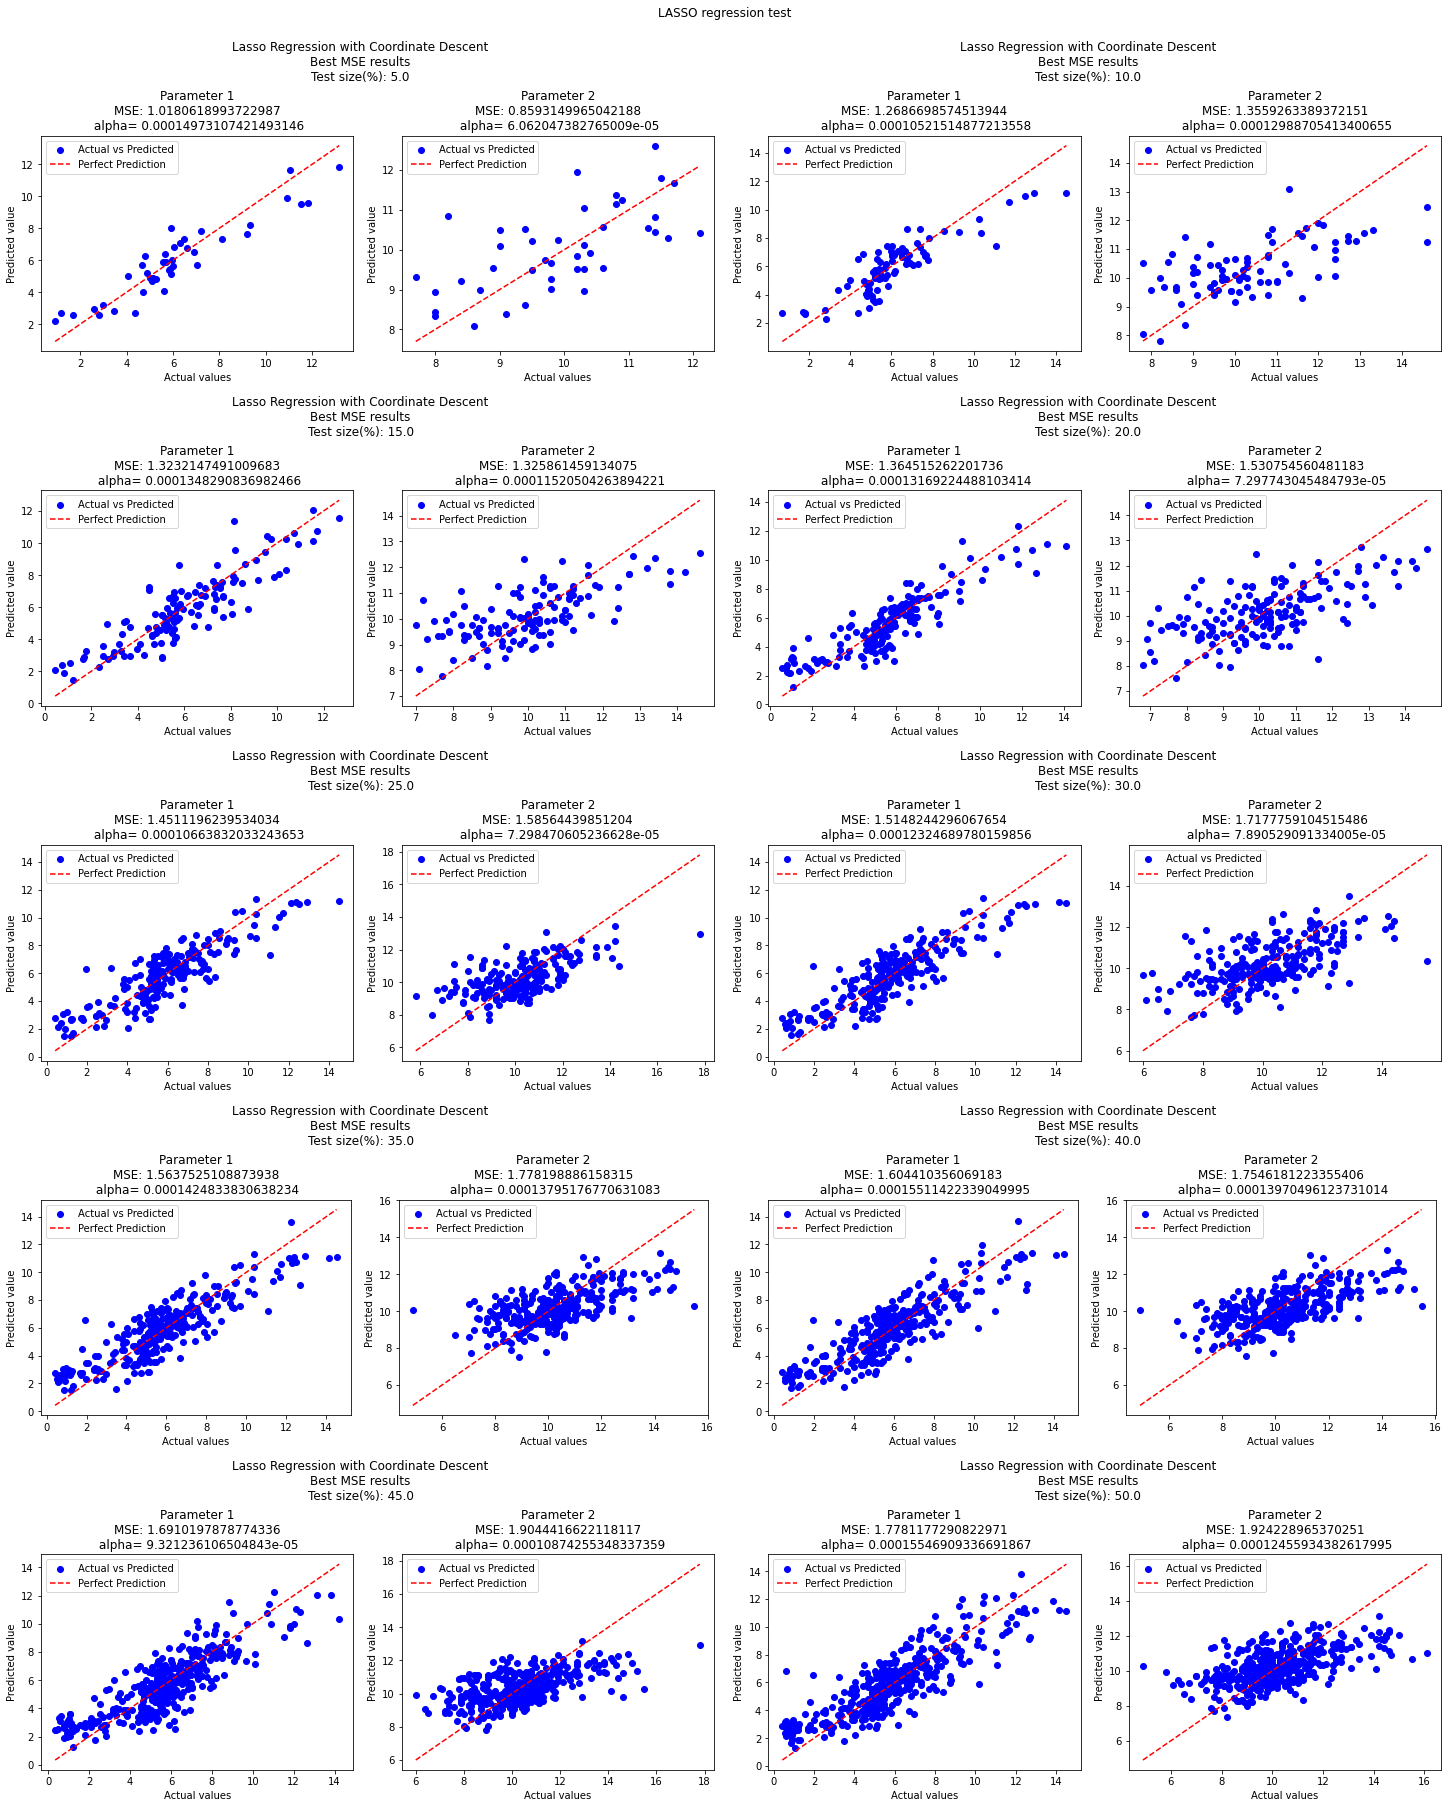

In [ ]:
mlflow.set_experiment("Lasso CD genetics")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
import sys, os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

#number of trials
trials = 100
np.random.seed(42)
seeds = np.random.randint(trials, size=trials)

ripartisions = [i / 100 for i in range(5, 55, 5)]
results = []  

# create 5x2 subfigs
fig = plt.figure(constrained_layout=True, figsize=(20, 25))
fig.suptitle('LASSO regression test' + "\n")
subfigs = fig.subfigures(nrows=5, ncols=2).flatten()
k = 0




'''Param 1'''

for ripartition in ripartisions:


    MSE_param1 = []
    best_MSE_1 = 100000000
    best_data_1 = {"Y_test": None, "Y_pred": None, "seed": None,"alpha":None}


    run_name = str(ripartition) + " ripartition"
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param('ripartition', ripartition)
    
        i = 0
        for i in range(trials):
            print("Ripartion: " + str(ripartition) + " - trial: " + str(i))
            #Ripartition in training and test and
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y[:, 0], test_size=ripartition, random_state=seeds[i])
            param_grid = {'alpha': Continuous(1/100000,0.01)}
            lasso_reg_cd = Lasso(max_iter=5000, tol=1e-2)
    
                    
            evolved_estimator = GASearchCV(estimator=lasso_reg_cd,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=False,
                              population_size=10,
                              generations=10)
    
            evolved_estimator.fit(X_train, Y_train)
    
            # Make predictions using the testing set
            Y_pred_lasso_cd = evolved_estimator.predict(X_test)
    
            #save MSE of the first parameters
            MSE_param1.append(mean_squared_error(Y_test, Y_pred_lasso_cd))
    
            #check if this is the best model in terms of MSE
            if MSE_param1[-1] < best_MSE_1:
                best_MSE_1 = MSE_param1[-1]
                best_data_1["Y_test"] = Y_test
                best_data_1["Y_pred"] = Y_pred_lasso_cd
                best_data_1["alpha"] = float(evolved_estimator.best_params_["alpha"])
                best_data_1["seed"] = seeds[i]
                
        mlflow.log_metric("Best_MSE1", best_MSE_1)
        mlflow.log_metric("Mean_MSE1", np.mean(MSE_param1))
        mlflow.log_metric("Var_MSE1", np.var(MSE_param1))
        mlflow.log_metric("alpha1", best_data_1["alpha"])



        MSE_param2 = []
        best_MSE_2 = 100000000
        best_data_2 = {"Y_test": None, "Y_pred": None, "seed": None, "alpha":None}
        i = 0
        for i in range(trials):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y[:, 1], test_size=ripartition, random_state=seeds[i])
            param_grid = {'alpha': Continuous(1/100000,0.01)}
            lasso_reg_cd = Lasso(max_iter=5000, tol=1e-2)
    
                    
            evolved_estimator = GASearchCV(estimator=lasso_reg_cd,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=False,
                              population_size=10,
                              generations=10)
    
            evolved_estimator.fit(X_train, Y_train)
    
            # Make predictions using the testing set
            Y_pred_lasso_cd = evolved_estimator.predict(X_test)
    
            #save MSE of the second parameters
            MSE_param2.append(mean_squared_error(Y_test, Y_pred_lasso_cd))
    
            #check if this is the best model in terms of MSE
            if MSE_param2[-1] < best_MSE_2:
                best_MSE_2 = MSE_param2[-1]
                best_data_2["Y_test"] = Y_test
                best_data_2["Y_pred"] = Y_pred_lasso_cd
                best_data_2["alpha"] = float(evolved_estimator.best_params_["alpha"])
                best_data_2["seed"] = seeds[i]

            
       
        mlflow.log_metric("Best_MSE2", best_MSE_2)
        mlflow.log_metric("Mean_MSE2", np.mean(MSE_param2))
        mlflow.log_metric("Var_MSE2", np.var(MSE_param2))
        mlflow.log_metric("alpha2", best_data_2["alpha"])
            
    results.append([str(ripartition * 100), str(best_MSE_1), str(best_MSE_2),
                    (np.mean(MSE_param1)), str(np.mean(MSE_param2)), str(np.var(MSE_param1)), str(np.var(MSE_param2)),
                    str(best_data_1["alpha"]), str(best_data_2["alpha"]), best_data_1["seed"],best_data_2["seed"]])

    
    '''PLOT THE BEST MODELS'''
    subfigs[k].suptitle(
        "Lasso Regression with Coordinate Descent" + "\n" + "Best MSE results" + "\n" + f"Test size(%): {ripartition * 100}")
    # create 1x2 subplots per subfig
    axs = subfigs[k].subplots(nrows=1, ncols=2)
    axs[0].scatter(best_data_1["Y_test"], best_data_1["Y_pred"], c='blue', label='Actual vs Predicted')
    axs[0].plot([min(best_data_1["Y_test"]), max(best_data_1["Y_test"])],
                [min(best_data_1["Y_test"]), max(best_data_1["Y_test"])], '--', c='red', label='Perfect Prediction')
    axs[0].legend()
    axs[0].set_xlabel("Actual values")
    axs[0].set_ylabel("Predicted value")
    axs[0].set_title(
        "Parameter 1" + "\n" + "MSE: " + str(min(MSE_param1)) + "\n" + " alpha= " + str(best_data_1["alpha"]))

    axs[1].scatter(best_data_2["Y_test"], best_data_2["Y_pred"], c='blue', label='Actual vs Predicted')
    axs[1].plot([min(best_data_2["Y_test"]), max(best_data_2["Y_test"])],
                [min(best_data_2["Y_test"]), max(best_data_2["Y_test"])], '--', c='red', label='Perfect Prediction')
    axs[1].legend()
    axs[1].set_xlabel("Actual values")
    axs[1].set_ylabel("Predicted value")
    axs[1].set_title(
        "Parameter 2" + "\n" + "MSE: " + str(min(MSE_param2)) + "\n" + " alpha= " + str(best_data_2["alpha"]))
    k += 1


'''SHOW RESULTS'''
headers = ["Test size(%)", "Best(MSE1)", "Best(MSE2)", "Mean(MSE1)", "Mean(MSE2)", "Var(MSE1)", "Var(MSE2)",
           "alpha1","alpha2","Seed1","Seed2"]

print(tabulate(results, headers, tablefmt="double_outline"))




**LASSO with coordinate descent NRMSEPiqr**

0.25 ripartition
Trial:  1
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.722378	0.126198   	-0.458616  	-0.899942  
1  	20    	-0.771559	0.0945859  	-0.621913  	-0.862111  
2  	20    	-0.834124	0.0235911  	-0.800775  	-0.869207  
3  	20    	-0.840285	0.0212431  	-0.800775  	-0.869207  
4  	20    	-0.861394	0.014749   	-0.83279   	-0.87185   
5  	20    	-0.852137	0.0296275  	-0.79448   	-0.895136  
6  	20    	-0.850621	0.0472386  	-0.748732  	-0.899548  
7  	20    	-0.868816	0.0308612  	-0.80889   	-0.899548  
8  	20    	-0.886315	0.0113598  	-0.872185  	-0.899548  
9  	20    	-0.885173	0.0185847  	-0.838151  	-0.899548  
10 	20    	-0.888535	0.0214535  	-0.82885   	-0.899568  
Trial:  2
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.801174	0.0510955  	-0.731986  	-0.901502  
1  	20    	-0.838869	0.0345118  	-0.803998  	-0.89332   
2  	20    	-0.850419	0.0496934  	-0.745583  	-0.901962  
3  	20    	-0.879307	0.0258156  	-0.812534  	-0.901

2024/09/06 18:54:25 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Successfully registered model 'LASSO_CD_25.0'.
2024/09/06 18:54:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LASSO_CD_25.0, version 1
Created version '1' of model 'LASSO_CD_25.0'.


0.5 ripartition
Trial:  1
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.795326	0.0696608  	-0.658256  	-0.915745  
1  	20    	-0.871982	0.0389986  	-0.807109  	-0.915745  
2  	20    	-0.875272	0.035894   	-0.813549  	-0.915745  
3  	20    	-0.86257 	0.0483232  	-0.764819  	-0.915745  
4  	20    	-0.876138	0.0312746  	-0.83893   	-0.915745  
5  	20    	-0.867358	0.0388086  	-0.799693  	-0.915745  
6  	20    	-0.864209	0.0457182  	-0.783321  	-0.915745  
7  	20    	-0.867802	0.0495811  	-0.768082  	-0.915745  
8  	20    	-0.86125 	0.0523231  	-0.772007  	-0.915745  
9  	20    	-0.868362	0.0463819  	-0.782545  	-0.915745  
10 	20    	-0.879964	0.032782   	-0.806718  	-0.915609  
Trial:  2
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.752327	0.0456509  	-0.68963   	-0.833188  
1  	20    	-0.797284	0.0304955  	-0.745022  	-0.833188  
2  	20    	-0.80637 	0.0257208  	-0.768823  	-0.833188  
3  	20    	-0.811496	0.0342826  	-0.742523  	-0.8582

2024/09/07 00:36:11 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Successfully registered model 'LASSO_CD_50.0'.
2024/09/07 00:36:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LASSO_CD_50.0, version 1
Created version '1' of model 'LASSO_CD_50.0'.


0.75 ripartition
Trial:  1
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.769099	0.0821159  	-0.639834  	-0.897697  
1  	20    	-0.819944	0.0450679  	-0.75635   	-0.897697  
2  	20    	-0.873114	0.0355129  	-0.801079  	-0.918084  
3  	20    	-0.889368	0.0315231  	-0.801079  	-0.918084  
4  	20    	-0.905692	0.0115289  	-0.883502  	-0.918084  
5  	20    	-0.892813	0.0307844  	-0.803675  	-0.918084  
6  	20    	-0.907935	0.0154911  	-0.867629  	-0.918546  
7  	20    	-0.904643	0.0298159  	-0.817551  	-0.918546  
8  	20    	-0.906775	0.0286658  	-0.822158  	-0.918084  
9  	20    	-0.885909	0.0643549  	-0.755151  	-0.918084  
10 	20    	-0.881163	0.0586806  	-0.772137  	-0.918084  
Trial:  2
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.768564	0.0746875  	-0.590471  	-0.867754  
1  	20    	-0.819195	0.0656976  	-0.69655   	-0.87189   
2  	20    	-0.844321	0.0491044  	-0.715635  	-0.881953  
3  	20    	-0.84332 	0.0641888  	-0.715412  	-0.881

2024/09/07 02:44:47 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Successfully registered model 'LASSO_CD_75.0'.
2024/09/07 02:44:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LASSO_CD_75.0, version 1
Created version '1' of model 'LASSO_CD_75.0'.


╔════════════════╦═══════════════════╦═══════════════════╦══════════════════╦═════════════╦════════╗
║   Test size(%) ║   Best(NRMSEPiqr) ║   Mean(NRMSEPiqr) ║   Var(NRMSEPiqr) ║       alpha ║   Seed ║
╠════════════════╬═══════════════════╬═══════════════════╬══════════════════╬═════════════╬════════╣
║             25 ║          0.331005 ║          0.441164 ║       0.00417895 ║ 2.34492e-05 ║     20 ║
║             50 ║          0.358126 ║          0.448949 ║       0.00303226 ║ 1.61102e-05 ║     87 ║
║             75 ║          0.380237 ║          0.466033 ║       0.00310308 ║ 3.04999e-05 ║     80 ║
╚════════════════╩═══════════════════╩═══════════════════╩══════════════════╩═════════════╩════════╝


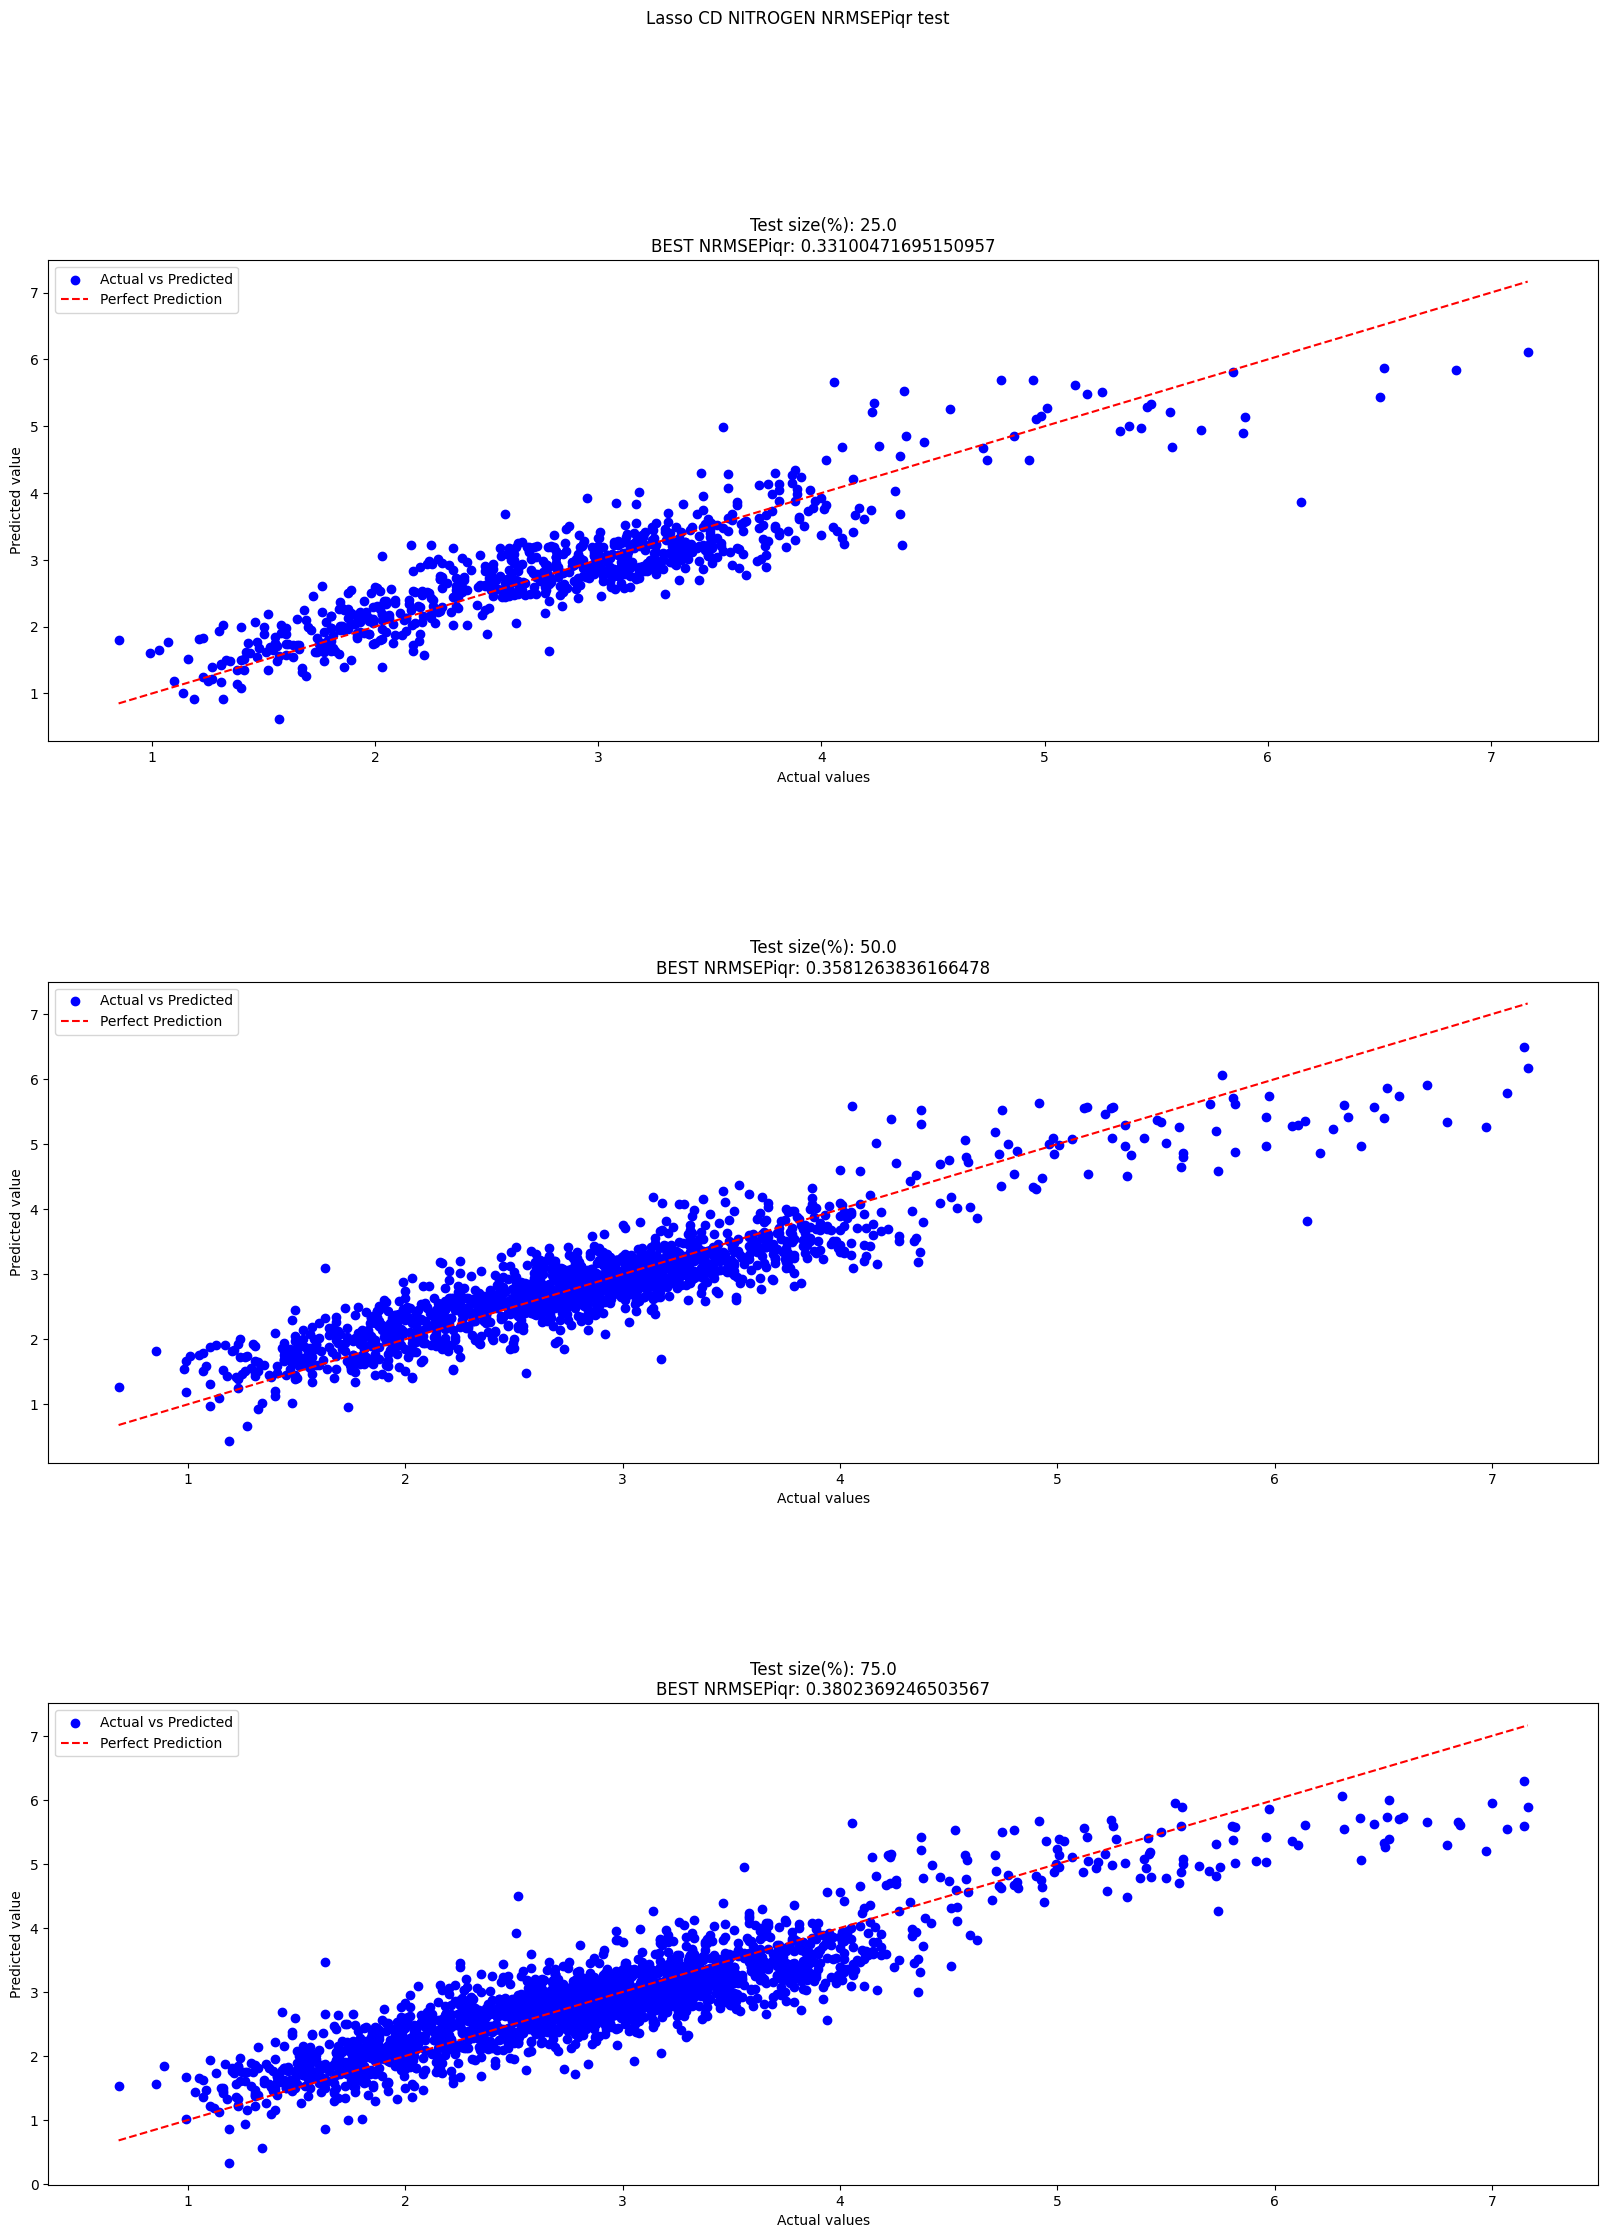

In [5]:
from sklearn.metrics import make_scorer

def NRMSEPiqr(observed_values, predicted_values):
    # Calculate RMSEP
    rmsep = np.sqrt(np.mean((observed_values - predicted_values) ** 2))
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(observed_values, 25)
    Q3 = np.percentile(observed_values, 75)

    # Calculate IQR
    IQR = Q3 - Q1

    return rmsep/IQR

NRMSEPiqrscorer = make_scorer(NRMSEPiqr, greater_is_better=False)



mlflow.set_experiment("Lasso CD NITROGEN genetics NRMSEPiqr")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
import sys, os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

#number of trials
trials = 100
np.random.seed(42)
seeds = np.random.randint(trials, size=trials)

ripartisions = [0.25, 0.5, 0.75]
results = []  

# create 3x1 subfigs
fig, axs = plt.subplots(3, 1,figsize=(20, 25),gridspec_kw={'hspace': 0.5})
fig.suptitle('Lasso CD NITROGEN NRMSEPiqr test'+"\n")
axs = axs.flatten()
k = 0




'''NITROGEN'''

for ripartition in ripartisions:

    NRMSEP = []

    best_NRMSEP = 100000000
    best_data_1 = {"Y_test":None, "Y_pred":None,"alpha":None,"seed":None}



    run_name = str(ripartition) + " ripartition"
    print(run_name)
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param('ripartition', ripartition)
        for i in range(trials):
            print("Trial: ", i+1)
            #Ripartition in training and test and
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ripartition, random_state=seeds[i])
            param_grid = {'alpha': Continuous(1/100000,0.01)}
            lasso_reg_cd = Lasso(max_iter=5000, tol=1e-2)
    
                    
            evolved_estimator = GASearchCV(estimator=lasso_reg_cd,
                              cv=5,
                              scoring=NRMSEPiqrscorer,
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=True,
                              population_size=10,
                              generations=10,
                              criteria = "min")
    
            evolved_estimator.fit(X_train, Y_train)
    
            # Make predictions using the testing set
            Y_pred_lasso_cd = evolved_estimator.best_estimator_.predict(X_test)
    
            
            NRMSEP.append(NRMSEPiqr(Y_test, Y_pred_lasso_cd))
    
            #check if this is the best model in terms of MSE
            if NRMSEP[-1] < best_NRMSEP:
                best_NRMSEP = NRMSEP[-1]
                best_data_1["Y_test"] = Y_test
                best_data_1["Y_pred"] = Y_pred_lasso_cd
                best_data_1["alpha"] = float(evolved_estimator.best_params_["alpha"])
                best_data_1["seed"] = seeds[i]
                best_data_1["model"] = evolved_estimator.best_estimator_

        mlflow.sklearn.log_model(
                sk_model=best_data_1["model"],
                artifact_path="sklearn-model",
                input_example=X_train,
                registered_model_name=f"LASSO_CD_{ripartition*100}"
            )

        
        mlflow.log_metric("Best_NRMSEPiqr", best_NRMSEP)
        mlflow.log_metric("Mean_NRMSEPiqr", np.mean(NRMSEP))
        mlflow.log_metric("Var_NRMSEPiqr", np.var(NRMSEP))
        mlflow.log_metric("alpha", best_data_1["alpha"])
        mlflow.log_metric("seed", best_data_1["seed"])



    results.append([str(ripartition *100 ), str(best_NRMSEP),
                    (np.mean(NRMSEP)), str(np.var(NRMSEP)),
                    str(best_data_1["alpha"]),best_data_1["seed"]])

    '''PLOT THE BEST MODELS'''
    axs[k].scatter(best_data_1["Y_test"], best_data_1["Y_pred"], c='blue', label='Actual vs Predicted')
    axs[k].plot([min(best_data_1["Y_test"]), max(best_data_1["Y_test"])],
                [min(best_data_1["Y_test"]), max(best_data_1["Y_test"])], '--', c='red', label='Perfect Prediction')
    axs[k].legend()
    axs[k].set_xlabel("Actual values")
    axs[k].set_ylabel("Predicted value")
    axs[k].set_title( f"Test size(%): {ripartition * 100}" "\n" + "BEST NRMSEPiqr: " + results[k][1] )
    k += 1


'''SHOW RESULTS'''

headers = ["Test size(%)", "Best(NRMSEPiqr)", "Mean(NRMSEPiqr)", "Var(NRMSEPiqr)","alpha","Seed"]

print(tabulate(results, headers,  tablefmt="double_outline"))




**LASSO with SGD**

In [ ]:
mlflow.set_experiment("Lasso SGD genetics Nitrogen MSE")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 
#number of trials
trials = 100
np.random.seed(42)
seeds = np.random.randint(trials, size=trials)

ripartisions = [0.25, 0.5, 0.75]
results = []  

# create 3x1 subfigs
fig, axs = plt.subplots(3, 1,figsize=(20, 25),gridspec_kw={'hspace': 0.5})
fig.suptitle('Lasso SGD NITROGEN MSE test'+"\n")
axs = axs.flatten()
k = 0


for ripartition in ripartisions:

    MSE_param1 = []

    best_MSE_1 = 100000000
    best_data_1 = {"Y_test":None, "Y_pred":None,"alpha":None,"seed":None}

    

    run_name = str(ripartition) + " ripartition"
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param('ripartition', ripartition)
        print(run_name)

        i = 0
        for i in range(trials):
            #Ripartition in training and test and
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ripartition, random_state=seeds[i])
            param_grid = {'alpha': Continuous(1/100000,0.01)}
            lasso_reg_sgd = SGDRegressor(max_iter=5000, tol=1e-5, penalty="l1", eta0=0.01,
                                                n_iter_no_change=10, random_state=42)
    
            evolved_estimator = GASearchCV(estimator=lasso_reg_sgd,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=True,
                              population_size=10,
                              generations=10)
    
            #grid search will contain the best model
            evolved_estimator.fit(X_train, Y_train)
    
            # Make predictions using the testing set
            Y_pred_lasso_sgd =  evolved_estimator.predict(X_test)
    
            MSE_param1.append(mean_squared_error(Y_test, Y_pred_lasso_sgd))
    
            if MSE_param1[-1] < best_MSE_1:
              best_MSE_1 = MSE_param1[-1]
              best_data_1["Y_test"] = Y_test
              best_data_1["Y_pred"] = Y_pred_lasso_sgd
              best_data_1["alpha"] =  float(evolved_estimator.best_params_["alpha"])
              best_data_1["seed"] = seeds[i]
        
        mlflow.log_metric("Best_MSE", best_MSE_1)
        mlflow.log_metric("Mean_MSE", np.mean(MSE_param1))
        mlflow.log_metric("Var_MSE", np.var(MSE_param1))
        mlflow.log_metric("alpha", best_data_1["alpha"])
        mlflow.log_metric("seed", best_data_1["seed"])
        
    results.append([str(ripartition *100 ), str(best_MSE_1),
                    (np.mean(MSE_param1)), str(np.var(MSE_param1)),
                    str(best_data_1["alpha"]),best_data_1["seed"]])

    '''PLOT THE BEST MODELS'''
    axs[k].scatter(best_data_1["Y_test"], best_data_1["Y_pred"], c='blue', label='Actual vs Predicted')
    axs[k].plot([min(best_data_1["Y_test"]), max(best_data_1["Y_test"])],
                [min(best_data_1["Y_test"]), max(best_data_1["Y_test"])], '--', c='red', label='Perfect Prediction')
    axs[k].legend()
    axs[k].set_xlabel("Actual values")
    axs[k].set_ylabel("Predicted value")
    axs[k].set_title( f"Test size(%): {ripartition * 100}" "\n" + "BEST MSE: " + str(min(MSE_param1)) )
    k += 1


'''SHOW RESULTS'''

headers = ["Test size(%)", "Best(MSE)", "Mean(MSE)", "Var(MSE)","Seed"]

print(tabulate(results, headers,  tablefmt="double_outline"))



**LASSO with SGD NITROGEN**

0.25 ripartition
Trial:  1
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.770849	0.0713632  	-0.637105  	-0.882073  
1  	20    	-0.820982	0.0351211  	-0.7656    	-0.851795  
2  	20    	-0.852457	0.0127125  	-0.835828  	-0.869676  
3  	20    	-0.866998	0.00603887 	-0.850403  	-0.873975  
4  	20    	-0.867477	0.00617793 	-0.852281  	-0.876529  
5  	20    	-0.859038	0.0298361  	-0.788324  	-0.881845  
6  	20    	-0.848687	0.0372745  	-0.770182  	-0.881845  
7  	20    	-0.869015	0.0186698  	-0.818307  	-0.881845  
8  	20    	-0.871809	0.0100981  	-0.845164  	-0.881845  
9  	20    	-0.8678  	0.0136807  	-0.839136  	-0.881845  
10 	20    	-0.87493 	0.00509747 	-0.865715  	-0.881845  
Trial:  2
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.820202	0.0735386  	-0.641503  	-0.879452  
1  	20    	-0.868652	0.0083417  	-0.85577   	-0.879452  
2  	20    	-0.872711	0.00679048 	-0.860981  	-0.879452  
3  	20    	-0.875037	0.00622489 	-0.863353  	-0.879

2024/09/09 02:37:36 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Successfully registered model 'LASSO_SGD_25.0'.
2024/09/09 02:37:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LASSO_SGD_25.0, version 1
Created version '1' of model 'LASSO_SGD_25.0'.


0.5 ripartition
Trial:  1
gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	-0.8002	0.0358589  	-0.739429  	-0.877949  
1  	20    	-0.844907	0.0258507  	-0.812709  	-0.891174  
2  	20    	-0.867733	0.020391   	-0.830657  	-0.891174  
3  	20    	-0.884304	0.00933053 	-0.862684  	-0.892654  
4  	20    	-0.88005 	0.0343963  	-0.776932  	-0.892654  
5  	20    	-0.881204	0.0207895  	-0.825838  	-0.892654  
6  	20    	-0.886804	0.009487   	-0.859519  	-0.892654  
7  	20    	-0.886075	0.0143971  	-0.843417  	-0.892654  
8  	20    	-0.885868	0.014309   	-0.843417  	-0.892654  
9  	20    	-0.882734	0.0245122  	-0.809468  	-0.892593  
10 	20    	-0.889791	0.00470423 	-0.877332  	-0.892593  
Trial:  2
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.797149	0.0272556  	-0.769163  	-0.858156  
1  	20    	-0.827894	0.0276489  	-0.786164  	-0.858156  
2  	20    	-0.852553	0.0066116  	-0.837992  	-0.861602  
3  	20    	-0.839145	0.0215494  	-0.806184  	-0.865744  

2024/09/09 06:25:32 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Successfully registered model 'LASSO_SGD_50.0'.
2024/09/09 06:25:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LASSO_SGD_50.0, version 1
Created version '1' of model 'LASSO_SGD_50.0'.


0.75 ripartition
Trial:  1
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.823679	0.0409773  	-0.780296  	-0.886629  
1  	20    	-0.854731	0.0257884  	-0.798665  	-0.899286  
2  	20    	-0.866694	0.0127109  	-0.851313  	-0.883028  
3  	20    	-0.874515	0.0135561  	-0.861198  	-0.89625   
4  	20    	-0.885542	0.0221411  	-0.828305  	-0.899946  
5  	20    	-0.890443	0.00831034 	-0.879747  	-0.899946  
6  	20    	-0.89543 	0.00254245 	-0.889218  	-0.90016   
7  	20    	-0.880945	0.0306534  	-0.805416  	-0.90016   
8  	20    	-0.888856	0.0180866  	-0.837744  	-0.90016   
9  	20    	-0.895896	0.00563483 	-0.87992   	-0.90016   
10 	20    	-0.894245	0.0143093  	-0.85183   	-0.903094  
Trial:  2
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	-0.80006	0.0425322  	-0.758608  	-0.87075   
1  	20    	-0.817158	0.0379862  	-0.76782   	-0.87123   
2  	20    	-0.83575 	0.032874   	-0.775344  	-0.87075   
3  	20    	-0.86012 	0.0136184  	-0.827585  	-0.87116

2024/09/09 08:20:23 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Successfully registered model 'LASSO_SGD_75.0'.
2024/09/09 08:20:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LASSO_SGD_75.0, version 1
Created version '1' of model 'LASSO_SGD_75.0'.


╔════════════════╦═══════════════════╦═══════════════════╦══════════════════╦═════════════╦════════╗
║   Test size(%) ║   Best(NRMSEPiqr) ║   Mean(NRMSEPiqr) ║   Var(NRMSEPiqr) ║       alpha ║   Seed ║
╠════════════════╬═══════════════════╬═══════════════════╬══════════════════╬═════════════╬════════╣
║             25 ║          0.507297 ║          0.621469 ║      0.0016337   ║ 7.78139e-05 ║     20 ║
║             50 ║          0.573839 ║          0.64682  ║      0.000900942 ║ 0.000105731 ║     60 ║
║             75 ║          0.638994 ║          0.709011 ║      0.00164421  ║ 4.09494e-05 ║     60 ║
╚════════════════╩═══════════════════╩═══════════════════╩══════════════════╩═════════════╩════════╝


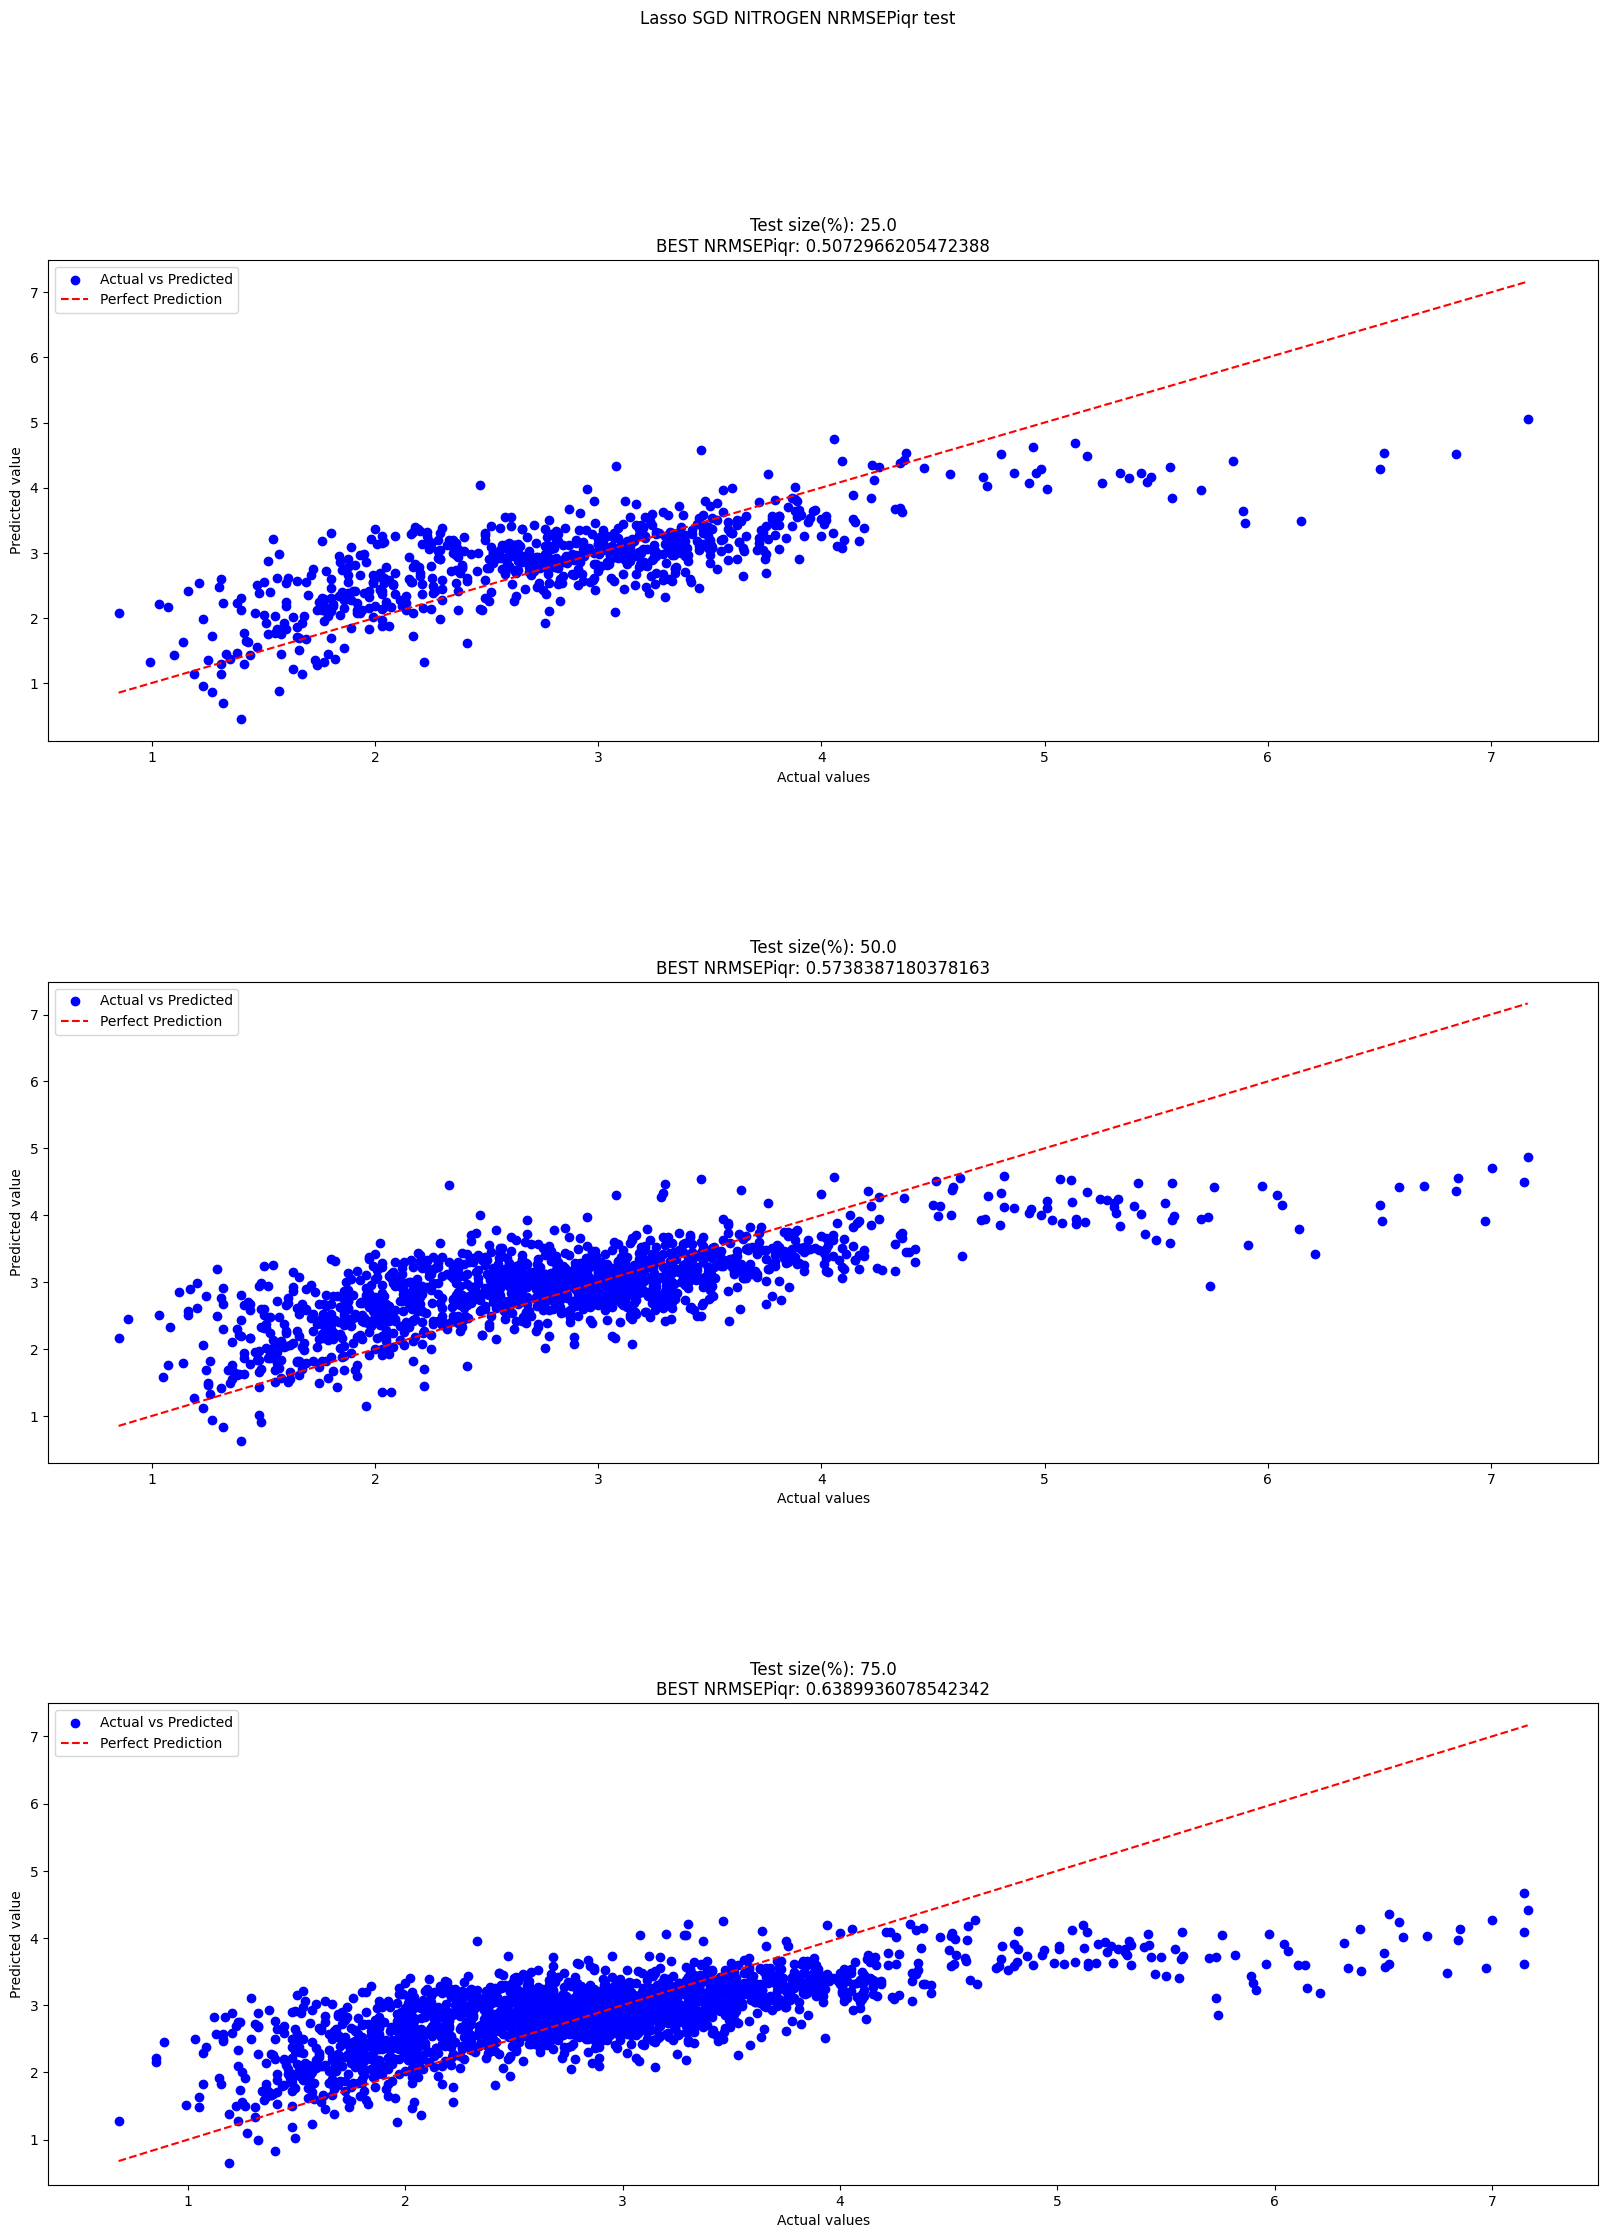

In [6]:
mlflow.set_experiment("Lasso SGD genetics Nitrogen")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 
#number of trials
trials = 100
np.random.seed(42)
seeds = np.random.randint(trials, size=trials)

ripartisions = [0.25, 0.5, 0.75]
results = []  

# create 3x1 subfigs
fig, axs = plt.subplots(3, 1,figsize=(20, 25),gridspec_kw={'hspace': 0.5})
fig.suptitle('Lasso SGD NITROGEN NRMSEPiqr test'+"\n")
axs = axs.flatten()
k = 0


for ripartition in ripartisions:

    NRMSEP = []

    best_NRMSEP = 100000000
    best_data_1 = {"Y_test":None, "Y_pred":None,"alpha":None,"seed":None}

    

    run_name = str(ripartition) + " ripartition"
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param('ripartition', ripartition)
        print(run_name)

        i = 0
        for i in range(trials):
            print("Trial: ", i+1)
            #Ripartition in training and test and
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ripartition, random_state=seeds[i])
            param_grid = {'alpha': Continuous(1/100000,0.01)}
            lasso_reg_sgd = SGDRegressor(max_iter=5000, tol=1e-5, penalty="l1", eta0=0.01,
                                                n_iter_no_change=10, random_state=42)
    
            evolved_estimator = GASearchCV(estimator=lasso_reg_sgd,
                              cv=5,
                              scoring=NRMSEPiqrscorer,
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=True,
                              population_size=10,
                              generations=10,
                              criteria = "min")
    
            #grid search will contain the best model
            evolved_estimator.fit(X_train, Y_train)
    
            # Make predictions using the testing set
            Y_pred_lasso_sgd =  evolved_estimator.predict(X_test)
    
            NRMSEP.append(NRMSEPiqr(Y_test, Y_pred_lasso_sgd))
    
            #check if this is the best model in terms of MSE
            if NRMSEP[-1] < best_NRMSEP:
                best_NRMSEP = NRMSEP[-1]
                best_data_1["Y_test"] = Y_test
                best_data_1["Y_pred"] = Y_pred_lasso_sgd
                best_data_1["alpha"] = float(evolved_estimator.best_params_["alpha"])
                best_data_1["seed"] = seeds[i]
                best_data_1["model"] = evolved_estimator.best_estimator_

        mlflow.sklearn.log_model(
                sk_model=best_data_1["model"],
                artifact_path="sklearn-model",
                input_example=X_train,
                registered_model_name=f"LASSO_SGD_{ripartition*100}"
            )


        
        mlflow.log_metric("Best_NRMSEPiqr", best_NRMSEP)
        mlflow.log_metric("Mean_NRMSEPiqr", np.mean(NRMSEP))
        mlflow.log_metric("Var_NRMSEPiqr", np.var(NRMSEP))
        mlflow.log_metric("alpha", best_data_1["alpha"])
        mlflow.log_metric("seed", best_data_1["seed"])
        
    results.append([str(ripartition *100 ), str(best_NRMSEP),
                    (np.mean(NRMSEP)), str(np.var(NRMSEP)),
                    str(best_data_1["alpha"]),best_data_1["seed"]])

    '''PLOT THE BEST MODELS'''
    axs[k].scatter(best_data_1["Y_test"], best_data_1["Y_pred"], c='blue', label='Actual vs Predicted')
    axs[k].plot([min(best_data_1["Y_test"]), max(best_data_1["Y_test"])],
                [min(best_data_1["Y_test"]), max(best_data_1["Y_test"])], '--', c='red', label='Perfect Prediction')
    axs[k].legend()
    axs[k].set_xlabel("Actual values")
    axs[k].set_ylabel("Predicted value")
    axs[k].set_title( f"Test size(%): {ripartition * 100}" "\n" + "BEST NRMSEPiqr: " + results[k][1] )
    k += 1


'''SHOW RESULTS'''

headers = ["Test size(%)", "Best(NRMSEPiqr)", "Mean(NRMSEPiqr)", "Var(NRMSEPiqr)","alpha","Seed"]

print(tabulate(results, headers,  tablefmt="double_outline"))


